In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Load the CSV into a Pandas DataFrame and show the first 5 rows
data = pd.read_excel(r"C:\Users\User\OneDrive\Desktop\Storage box\Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Show the dataset shape (rows, columns) and column names with dtypes.
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")
data.info()

The dataset has 541909 rows and 8 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#Count unique values per column and list the top 10 most frequent values in a categorical field
print(data.nunique())
print(data[["Country", "Description"]].value_counts().head(10))

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64
Country         Description                       
United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER    2271
                JUMBO BAG RED RETROSPOT               2001
                REGENCY CAKESTAND 3 TIER              1859
                PARTY BUNTING                         1634
                LUNCH BAG RED RETROSPOT               1460
                ASSORTED COLOUR BIRD ORNAMENT         1416
                SET OF 3 CAKE TINS PANTRY DESIGN      1316
                LUNCH BAG  BLACK SKULL.               1292
                NATURAL SLATE HEART CHALKBOARD        1250
                HEART OF WICKER SMALL                 1199
Name: count, dtype: int64


In [5]:
#Find missing values per column and report counts.
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [7]:
#Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.
data_1 = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Storage box\Mall_Customers.csv")
bins = [0, 30, 60, 100]  
labels = ["Young", "Adult", "Senior"]

data_1["AgeGroup"] = pd.cut(data_1["Age"], bins=bins, labels=labels, right=False)

counts = data_1["AgeGroup"].value_counts()

print("\nCounts by Age Group:\n", counts)
data_1.head()


Counts by Age Group:
 AgeGroup
Adult     125
Young      55
Senior     20
Name: count, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Young
4,5,Female,31,17,40,Adult


In [8]:
#Detect and count any unrealistic values (e.g., negative or zero values).
unrealistic = data[data["Quantity"] <= 0]
count_unrealistic = (data["Quantity"] <= 0).sum()
print(count_unrealistic)

data = data[data["Quantity"] > 0]

10624


In [9]:
unrealistic_price = data[data["UnitPrice"] <= 0]
count_unrealistic_price = (data["UnitPrice"] <= 0).sum()
print(count_unrealistic_price)

data = data[data["UnitPrice"] > 0]

1181


In [10]:
#Find how many unique customers exist and which group/category is most common.
unique_customers = data["CustomerID"].nunique()
print(f"There are {unique_customers} uniques customers")

mst_common = data["CustomerID"].mode()[0]
print(f"This is the most common customerID: {mst_common}")

There are 4338 uniques customers
This is the most common customerID: 17841.0


In [11]:
#Remove rows with missing values in a key column and explain the pros/cons.
data = data.drop(columns=["CustomerID"])
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.4+ MB


In [12]:
#Drop duplicate rows and report how many were dropped
data = data.drop_duplicates()
data_1 = data_1.drop_duplicates()


In [13]:
#Filter out records where Age < 18.
data_1 = data_1[data_1["Age"] >= 18]


In [14]:
#Create a new categorical column from numeric data using conditional statements
data["Price_grouping"] = np.where(
    data["UnitPrice"] < 2, "cheap",
    np.where(data["UnitPrice"] > 4, "expensive", "affordable")
)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Price_grouping
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,affordable
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,affordable
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,affordable
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,affordable
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,affordable


In [15]:
#Replace missing values in a numeric column with the mean
#There was no missing values in the dataset hence we did not replace anything

In [16]:
#Bucket customers into categories based on quantiles (e.g., spending level).
bins = (0, 25, 50, 75, 100)
labels = ("very_low", "low", "high", "very_high")

data_1["Spendings"] = pd.cut(
    data_1["Spending Score (1-100)"], 
    bins=bins, 
    labels=labels, 
    right=False
)

data_1.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Spendings
0,1,Male,19,15,39,Young,low
1,2,Male,21,15,81,Young,very_high
2,3,Female,20,16,6,Young,very_low
3,4,Female,23,16,77,Young,very_high
4,5,Female,31,17,40,Adult,low


In [17]:
#Explain and apply feature scaling to numeric features
num_cols = pd.DataFrame(data_1.select_dtypes(include="number"))
num_cols.head()

x =num_cols.drop(num_cols[["CustomerID"]], axis=1)

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Aggregation & feature engineering (16–22)

In [18]:
#Compute average income by gender using groupby.
avg_income_gender = data_1.groupby("Genre")["Annual Income (k$)"].mean()
print (avg_income_gender)

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [19]:
#Calculate max, min, and mean for numeric columns per group
min_cols = pd.DataFrame(data_1.groupby("Genre")[["Age","Annual Income (k$)","Spending Score (1-100)"]].min())
print(min_cols)

print ("*" * 100)

max_cols = pd.DataFrame(data_1.groupby("Genre")[["Age","Annual Income (k$)","Spending Score (1-100)"]].max())
print(max_cols)

print ("*" * 100)

mean_cols = pd.DataFrame(data_1.groupby("Genre")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean())
print(mean_cols)

        Age  Annual Income (k$)  Spending Score (1-100)
Genre                                                  
Female   18                  16                       5
Male     18                  15                       1
****************************************************************************************************
        Age  Annual Income (k$)  Spending Score (1-100)
Genre                                                  
Female   68                 126                      99
Male     70                 137                      97
****************************************************************************************************
              Age  Annual Income (k$)  Spending Score (1-100)
Genre                                                        
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


In [20]:
#Create a new ratio feature (e.g., income-to-age).
data_1["Income_Age_ratio"] = data_1["Annual Income (k$)"]/data_1["Age"]
data_1.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Spendings,Income_Age_ratio
0,1,Male,19,15,39,Young,low,0.789474
1,2,Male,21,15,81,Young,very_high,0.714286
2,3,Female,20,16,6,Young,very_low,0.800000
3,4,Female,23,16,77,Young,very_high,0.695652
4,5,Female,31,17,40,Adult,low,0.548387


In [21]:
#Flag “High value” customers based on income and spending greater than average.
data_1["Customer_value"] = np.where((data_1["Spending Score (1-100)"] > 50.2) & (data_1["Annual Income (k$)"] > 60.56),"High Value", "Low Value")
data_1.tail()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Spendings,Income_Age_ratio,Customer_value
195,196,Female,35,120,79,Adult,very_high,3.428571,High Value
196,197,Female,45,126,28,Adult,low,2.800000,Low Value
197,198,Male,32,126,74,Adult,high,3.937500,High Value
198,199,Male,32,137,18,Adult,very_low,4.281250,Low Value
199,200,Male,30,137,83,Adult,very_high,4.566667,High Value


In [22]:
num_cols = pd.DataFrame(data_1.select_dtypes(include=['number']))
num_cols_corr = num_cols.corr()
print(num_cols_corr)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Income_Age_ratio          0.758986 -0.564576            0.769858   

                        Spending Score (1-100)  Income_Age_ratio  
CustomerID                            0.013835          0.758986  
Age                                  -0.327227         -0.564576  
Annual Income (k$)                    0.009903          0.769858  
Spending Score (1-100)                1.000000          0.152598  
Income_Age_ratio                      0.152598          1.000000  


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Income_Age_ratio          0.758986 -0.564576            0.769858   

                        Spending Score (1-100)  Income_Age_ratio  
CustomerID                            0.013835          0.758986  
Age                                  -0.327227         -0.564576  
Annual Income (k$)                    0.009903          0.769858  
Spending Score (1-100)                1.000000          0.152598  
Income_Age_ratio                      0.152598          1.000000  


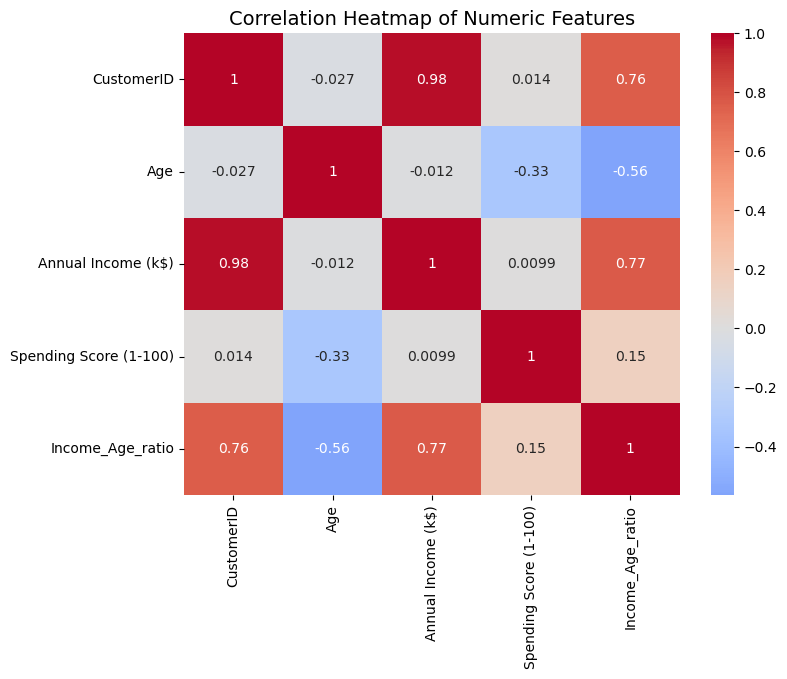

In [23]:
#Compute correlation between numeric features
num_cols = pd.DataFrame(data_1.select_dtypes(include=['number']))
num_cols_corr = num_cols.corr()
print(num_cols_corr)
plt.figure(figsize=(8,6))
sns.heatmap(num_cols_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

In [24]:
#Determine which gender has a higher average spending score
avg_spending_score_gender = data_1.groupby("Genre")["Spending Score (1-100)"].mean()
print(avg_spending_score_gender)

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [25]:
#Create a pivot table by age group and gender for average spending.
avg_spending_score_gender_age = pd.DataFrame(data_1.groupby(["Genre", "AgeGroup"])["Spending Score (1-100)"].mean())
print(avg_spending_score_gender_age)



                 Spending Score (1-100)
Genre  AgeGroup                        
Female Young                  60.379310
       Adult                  48.426667
       Senior                 48.500000
Male   Young                  56.576923
       Adult                  46.520000
       Senior                 39.333333


C:\Users\User\AppData\Local\Temp\ipykernel_2420\3571549122.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_score_gender_age = pd.DataFrame(data_1.groupby(["Genre", "AgeGroup"])["Spending Score (1-100)"].mean())


### Visualizations & group exploration 

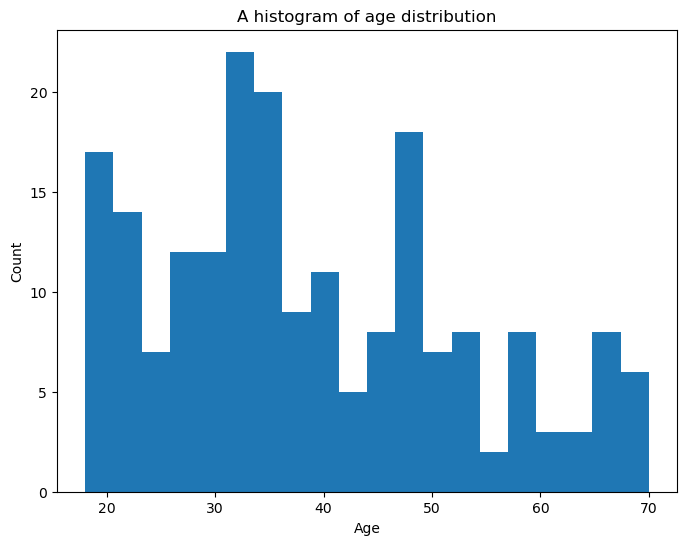

In [26]:
#Plot a histogram of the Age distribution
plt.figure(figsize = (8,6))
plt.hist(x=data_1["Age"], bins= 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("A histogram of age distribution")
plt.show()

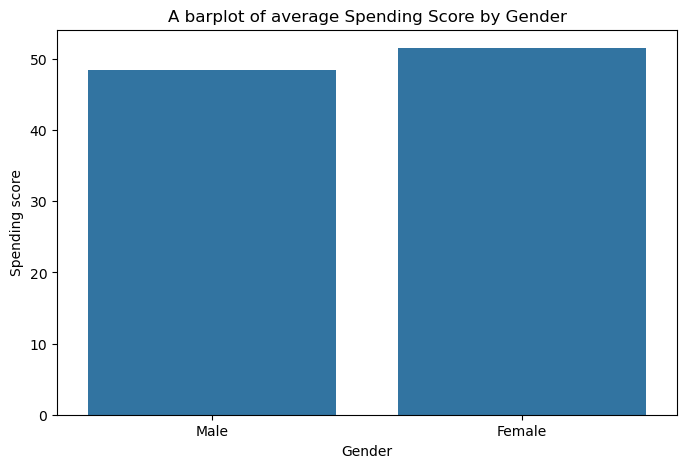

In [27]:
#Create a bar chart of average spending score by gender
plt.figure(figsize=(8,5))
sns.barplot(x="Genre", y="Spending Score (1-100)", data=data_1, errorbar=None)
plt.xlabel("Gender")
plt.ylabel("Spending score")
plt.title("A barplot of average Spending Score by Gender")
plt.show()

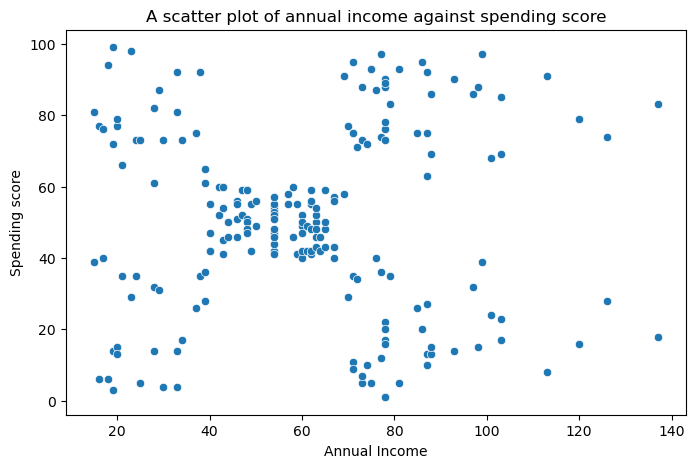

In [28]:
#Create a scatter plot of Annual Income vs Spending Score.
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data_1)
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("A scatter plot of annual income against spending score")
plt.show()


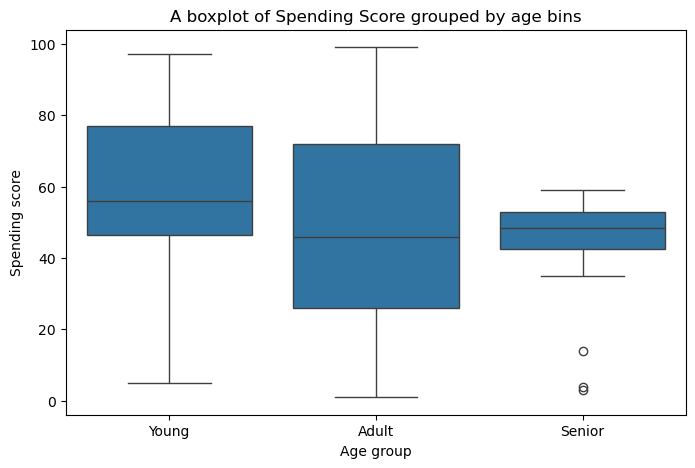

In [29]:
#Create a boxplot of spending score grouped by age bins
plt.figure(figsize=(8,5))
sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=data_1)
plt.xlabel("Age group")
plt.ylabel("Spending score")
plt.title("A boxplot of Spending Score grouped by age bins")
plt.show()

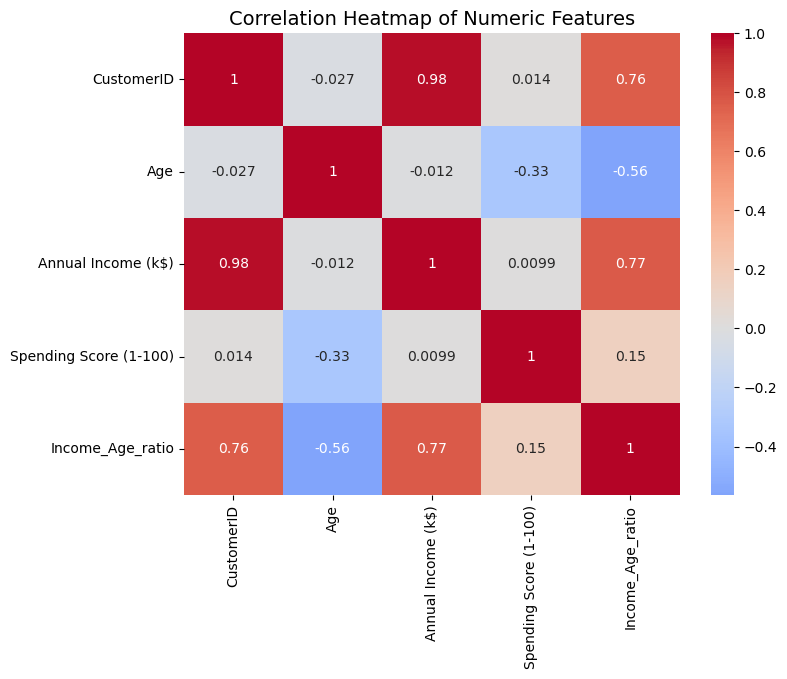

In [30]:
#Create a heatmap of correlations between numeric features
num_cols = pd.DataFrame(data_1.select_dtypes(include=['number']))
num_cols_corr = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(num_cols_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

### Dimensionality reduction (PCA & t-SNE)

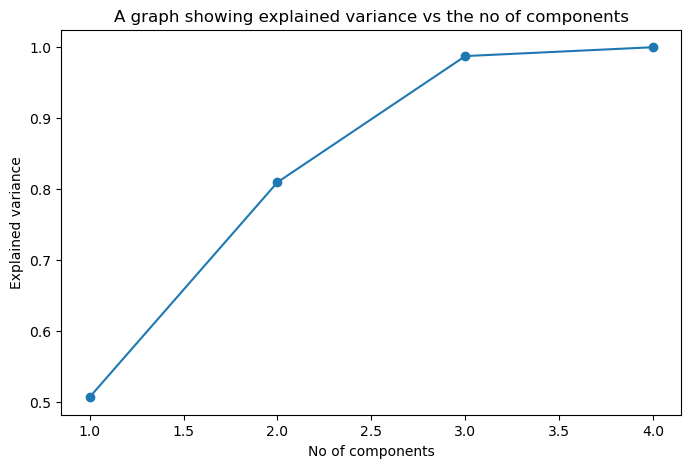

In [31]:
#Run PCA on standardized income and spending features and plot explained variance
num_cols = pd.DataFrame(data_1.select_dtypes(include="number"))
num_cols.head()

x =num_cols.drop(num_cols[["CustomerID"]], axis=1)
y =data_1["Customer_value"]

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))

pca = PCA()
x_pca = pca.fit(x_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1,len(x_pca.explained_variance_ratio_)+1),
         x_pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("No of components")
plt.ylabel("Explained variance")
plt.title("A graph showing explained variance vs the no of components")
plt.show()


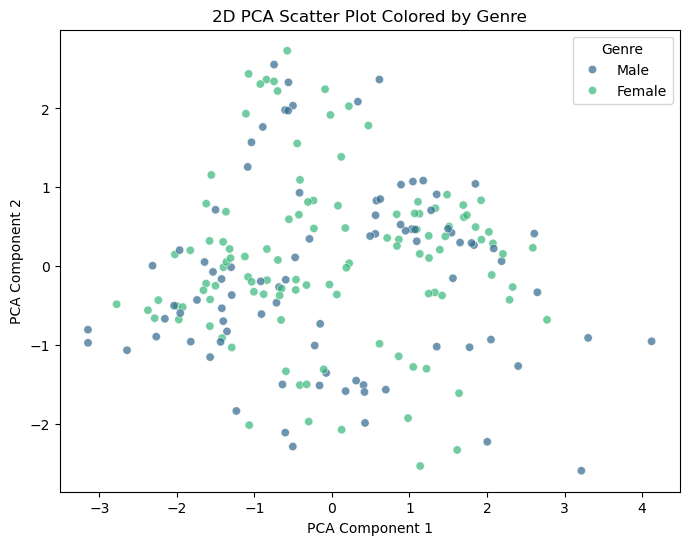

In [32]:
#Plot 2D PCA components scatter colored by a category (e.g., Gender).
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(components, columns=["PCA1", "PCA2"])
pca_df["Genre"] = data_1["Genre"] 

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", 
    y="PCA2", 
    hue="Genre",  
    data=pca_df, 
    palette="viridis", 
    alpha=0.7
)

plt.title("2D PCA Scatter Plot Colored by Genre")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Genre")
plt.show()


c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^

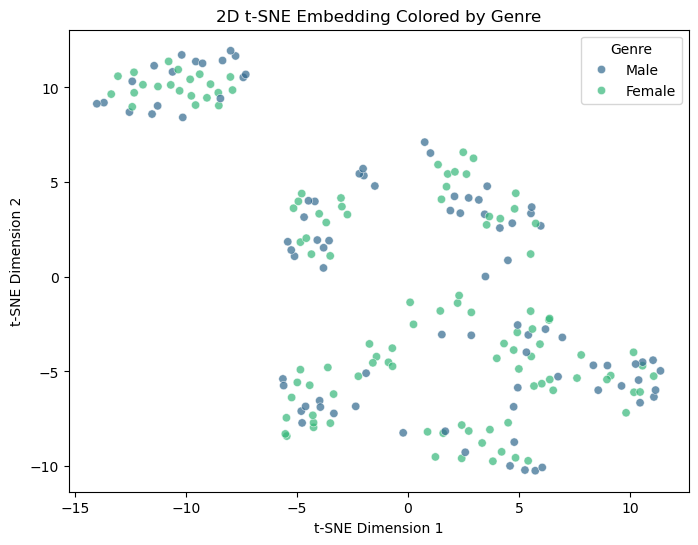

In [33]:
#Run t-SNE and plot the 2D embedding.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne.fit_transform(x_scaled)

tsne_df = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
tsne_df["Genre"] = data_1["Genre"] 

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="TSNE1", 
    y="TSNE2", 
    hue="Genre", 
    data=tsne_df, 
    palette="viridis", 
    alpha=0.7
)

plt.title("2D t-SNE Embedding Colored by Genre")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Genre")
plt.show()


### Compare PCA and t-SNE plots — which shows clearer clusters?
When comparing PCA and t-SNE, the PCA plot does not show clear separation between groups because the dataset has relatively few columns, which limits PCA’s ability to capture meaningful variance and highlight differences. In contrast, the t-SNE plot reveals tight, well-separated clusters, indicating that it performs better at uncovering the underlying nonlinear structures in the data. This demonstrates that while PCA is effective for reducing dimensionality in datasets with many correlated features, t-SNE provides clearer visualization of clusters in this case, making it the more effective method for identifying patterns.

### Clustering & evaluation 

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

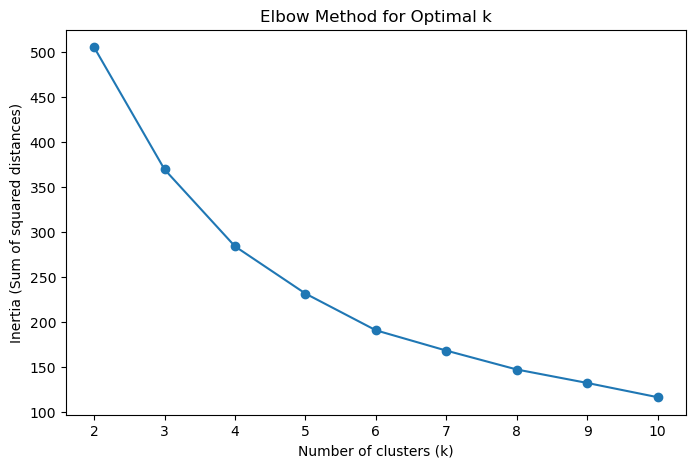

In [34]:
# Run k-means for k=2…10 on standardized features and plot the elbow curve
inertia = []  
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

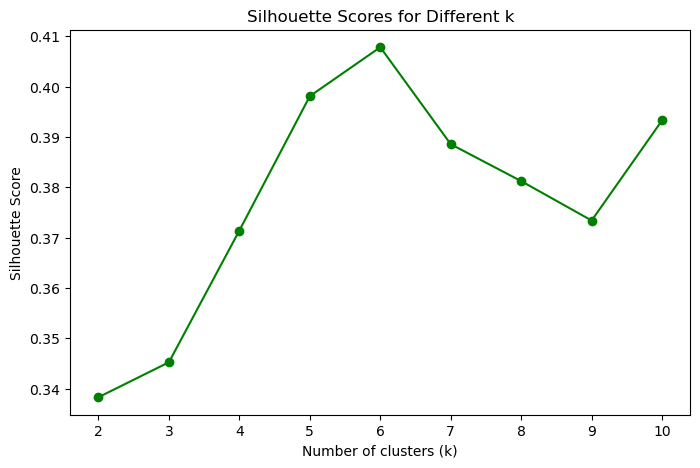

Best number of clusters (k) based on silhouette score: 6


In [35]:
#Compute silhouette score for each k and identify the best k
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    
    inertia.append(kmeans.inertia_)
    score = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker="o", color="green")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (k) based on silhouette score: {best_k}")

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


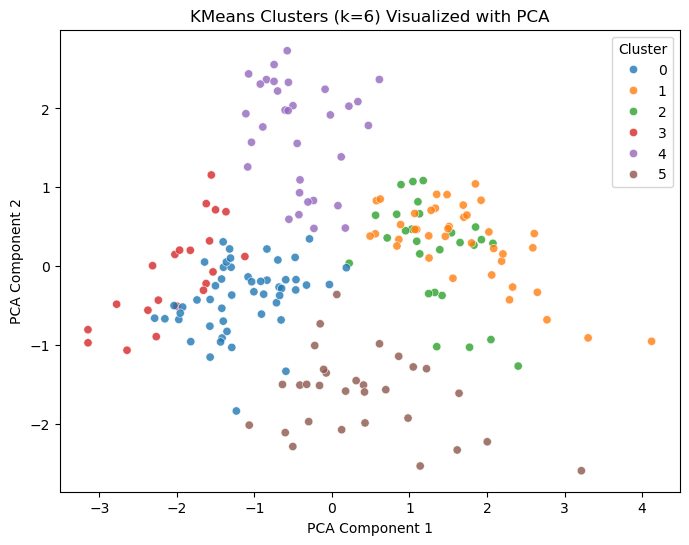

In [36]:
#Plot clusters for the chosen k using a scatter plot
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(x_scaled)

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

plot_df = pd.DataFrame(x_pca, columns=["PCA1", "PCA2"])
plot_df["Cluster"] = cluster_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    data=plot_df,
    palette="tab10",
    alpha=0.8
)

plt.title("KMeans Clusters (k=6) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

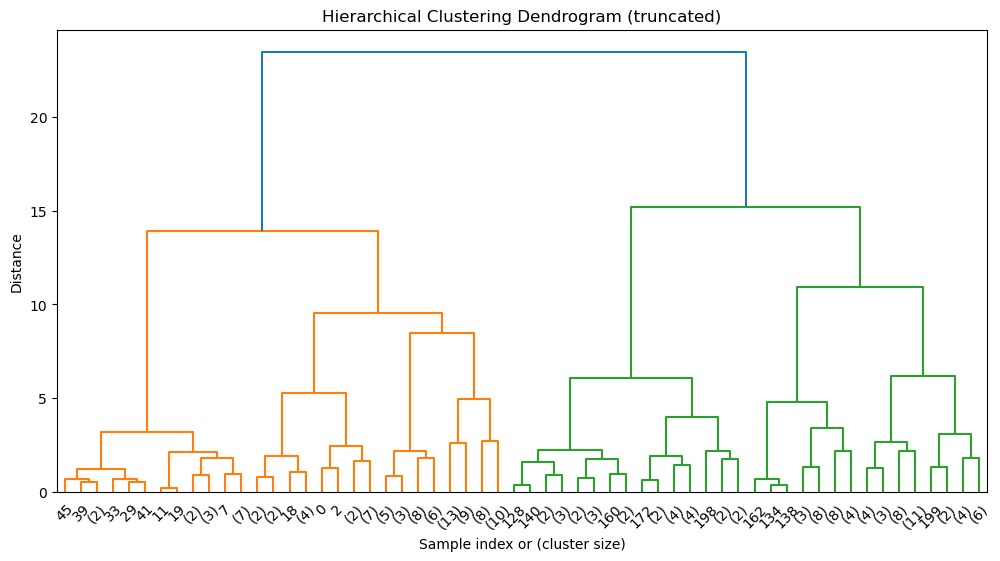

In [37]:
#Run hierarchical clustering and visualize a dendrogram.
Z = linkage(x_scaled, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5, leaf_rotation=45, leaf_font_size=10)

plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

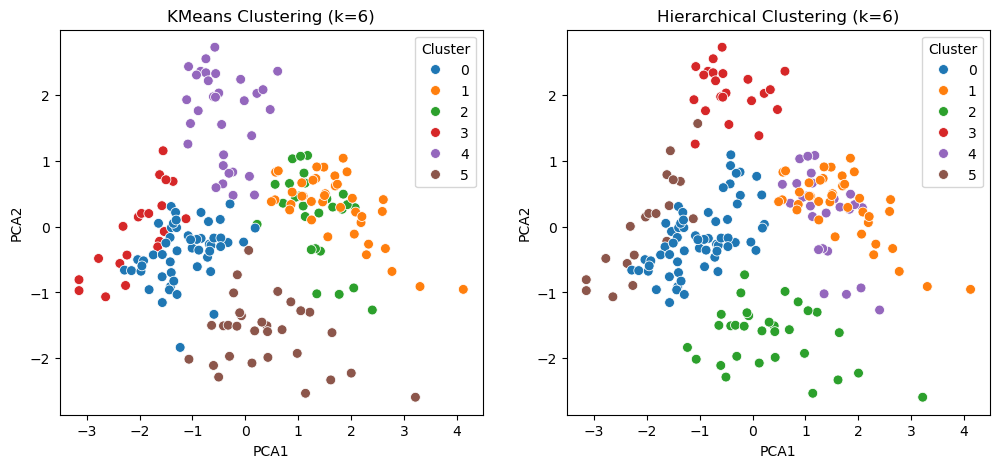

In [43]:
#Cut the dendrogram at k clusters and compare with k-means
pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scaled)   

agg_clust = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hier_labels = agg_clust.fit_predict(x_scaled)

pca_df = pd.DataFrame(reduced, columns=["PCA1", "PCA2"])
pca_df["KMeans"] = cluster_labels      
pca_df["Hierarchical"] = hier_labels


plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
sns.scatterplot(x="PCA1", y="PCA2", hue="KMeans", data=pca_df, palette='tab10', s=50)
plt.title("KMeans Clustering (k=6)")
plt.legend(title="Cluster")

# Hierarchical
plt.subplot(1,2,2)
sns.scatterplot(x="PCA1", y="PCA2", hue="Hierarchical", data=pca_df, palette='tab10', s=50)
plt.title("Hierarchical Clustering (k=6)")
plt.legend(title="Cluster")

plt.show()


In [39]:
#Profile each cluster: average age, income, spending score
data_1["Cluster"] = cluster_labels  
cluster_profile = data_1.groupby("Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean"
}).round(2)

print(cluster_profile)


           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        54.71               55.18                   48.27
1        32.69               86.54                   82.13
2        22.22               62.74                   42.67
3        45.52               26.29                   19.38
4        26.56               30.53                   70.28
5        43.30               90.00                   18.90


In [40]:
#Check cluster sizes — are some clusters too small?
cluster_sizes = data_1["Cluster"].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

#None of the  clusters were too small to ignore.

Cluster Sizes:
Cluster
0    51
1    39
4    32
5    30
2    27
3    21
Name: count, dtype: int64


In [41]:
#Run k-means with different random states and see if cluster assignments change.
random_states = [0, 21, 42, 91, 123]
assignments = []

for rs in random_states:
    km = KMeans(n_clusters=6, random_state=rs, n_init=10)
    km.fit(x_scaled)
    assignments.append(km.labels_)

for i in range(1, len(assignments)):
    ari = adjusted_rand_score(assignments[0], assignments[i])
    print(f"ARI between random_state={random_states[0]} and {random_states[i]}: {ari:.2f}")

#The number of clusters did not change

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

ARI between random_state=0 and 21: 1.00
ARI between random_state=0 and 42: 1.00
ARI between random_state=0 and 91: 0.99
ARI between random_state=0 and 123: 1.00


In [44]:
#Export the dataset with cluster labels to CSV  
data_1.to_csv("customer_clusters.csv", index=False)
